In [ ]:
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))

import numpy as np
import matplotlib.pyplot as plt

import mesh
import geometry
from stress_strain_analysis import stress_strain_analysis
import plot_functions

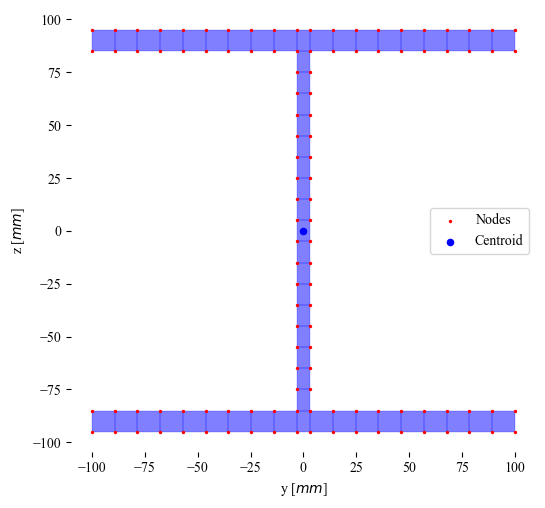

╒════════════════════╤═══════════════╕
│ Mesh Type          │ quadrilateral │
├────────────────────┼───────────────┤
│ Number of elements │ 55            │
├────────────────────┼───────────────┤
│ Number of nodes    │ 112           │
├────────────────────┼───────────────┤
│ Cross Section Area │ 5105.00       │
╘════════════════════╧═══════════════╛
╒══════════════════════════╤═════════════╤═════════════╕
│                          │           y │           z │
╞══════════════════════════╪═════════════╪═════════════╡
│ Centroid [mm]            │        0.00 │        0.00 │
├──────────────────────────┼─────────────┼─────────────┤
│ Moment of inertia [mm^4] │ 35094541.67 │ 13337223.85 │
╘══════════════════════════╧═════════════╧═════════════╛


In [2]:
H    = geometry.H_beam(web_width     =   6.5,
                       web_height    = 170.0,
                       flange_width  = 200.0,
                       flange_height =  10.0)
Mesh = mesh.Mesh(H, "quadrilateral", 10)

Mesh.plot()
Mesh.print()

(1.4551915228366852e-14, 70.6608949218747, 11.306615658398234)


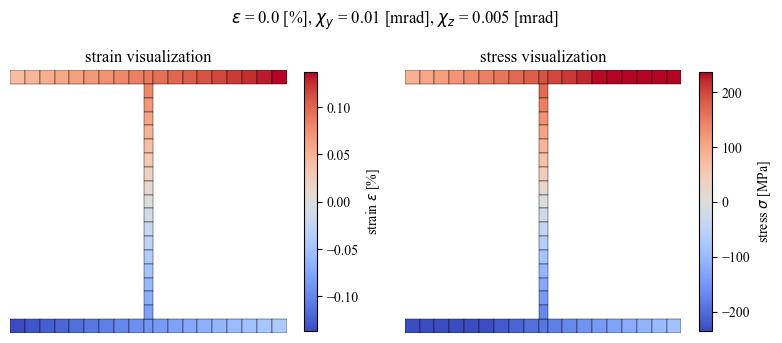

In [3]:
Analysis = stress_strain_analysis(Mesh)

Analysis.set_strain_and_curvature(0.00, 0.00001, 0.000005)

Analysis.calculate_strains()
Analysis.calculate_stresses()

print(Analysis.get_section_forces())

plot_functions.plot_stress_strain_steel(Analysis)

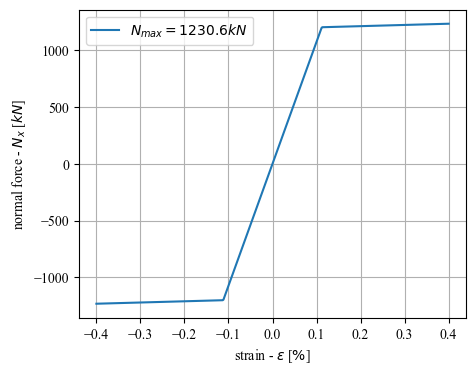

In [4]:
strains = np.linspace(-0.004, 0.004, 500)
plot_functions.plot_linear_variation_eps(Analysis, strains)

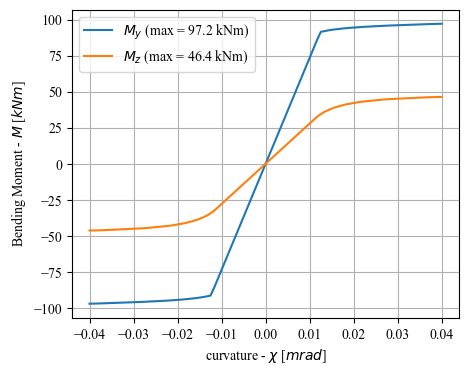

In [5]:
curvs = np.linspace(-0.00004, 0.00004, 100)
plot_functions.plot_linear_variation_curv(Analysis, curvs)

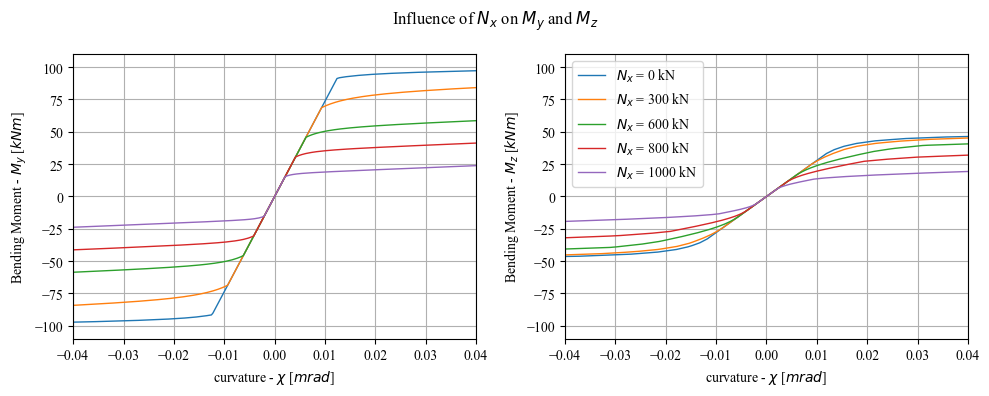

In [6]:
N = [0, 300, 600, 800, 1000]
My_lim = [-100, 100]
Mz_lim = [-100, 100]
plot_functions.plot_influence_of_N_on_M(Analysis, N, My_lim, Mz_lim)

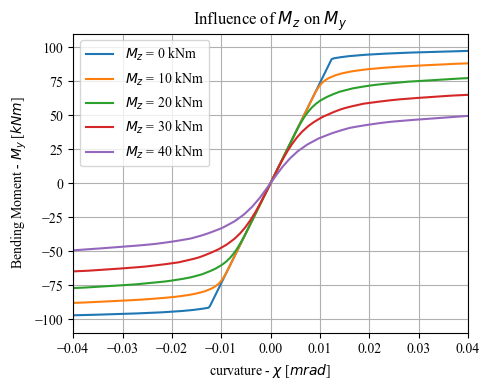

In [7]:
Mz = [0, 10, 20, 30, 40]
My_lim = [-100, 100]
plot_functions.plot_influence_of_Mz_on_My(Analysis, My_lim, Mz)